In [69]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [70]:
agriculture_data=pd.read_csv('train_agriculture.csv')

### EDA

In [71]:
agriculture_data.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [72]:
agriculture_data.shape

(88858, 10)

Dropping ID column since it is just a unique number for each row.

In [73]:
agriculture_data.drop(['ID'],inplace=True,axis=1)

In [74]:
agriculture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


Obs: Number_Weeks_Used is float and rest all are int

#### Checking for null values

In [75]:
agriculture_data.isna().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

Obs: Number_Weeks_Used has 9000 null values

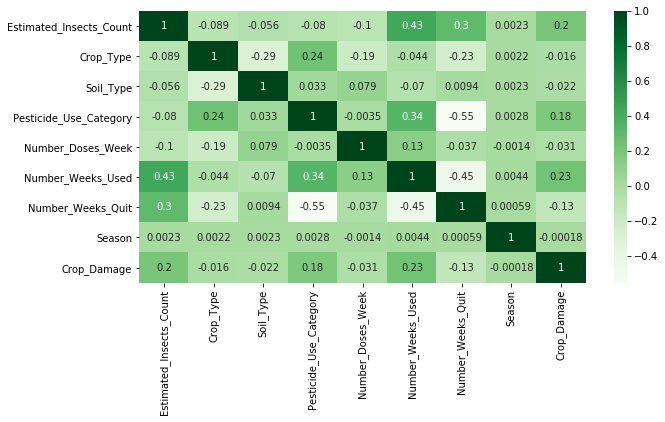

In [76]:
import seaborn as sb
plt.figure(figsize=(10,5))
sb.heatmap(agriculture_data.corr(),annot=True,cmap='Greens')

Multicollinearity issue does not exist 

 All attributes are less correlated to each other

In [77]:
agriculture_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


Obs: Estimated_Insects_Count,Number_Doses_Weeks,Number_Weeks_Used,Number_weeks_Quit seems to have Outliers

Only approx 25% values lies in 1 Standard deviation for Estimated_insects_count and Number_Weeks_Used, means these attributes have widely spread data

#### Dealing with null values

In [78]:
agriculture_data['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [79]:
agriculture_data['Number_Weeks_Used'].mean()

28.62397004683313

In [80]:
#replacing na values with mean count but since number weeks used should be a number hence picking up the integral part only i.e 28
agriculture_data['Number_Weeks_Used']=agriculture_data['Number_Weeks_Used'].fillna(28.0)

In [81]:
agriculture_data.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

Obs: Null values removed

In [82]:
agriculture_data.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


Estimated_Insects_Count       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Crop_Type                  AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Soil_Type                  AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Pesticide_Use_Category        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Number_Doses_Week          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Number_Weeks_Used          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number_Weeks_Quit                AxesSubplot(0.125,0.125;0.227941x0.222059)
Season                        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Crop_Damage                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

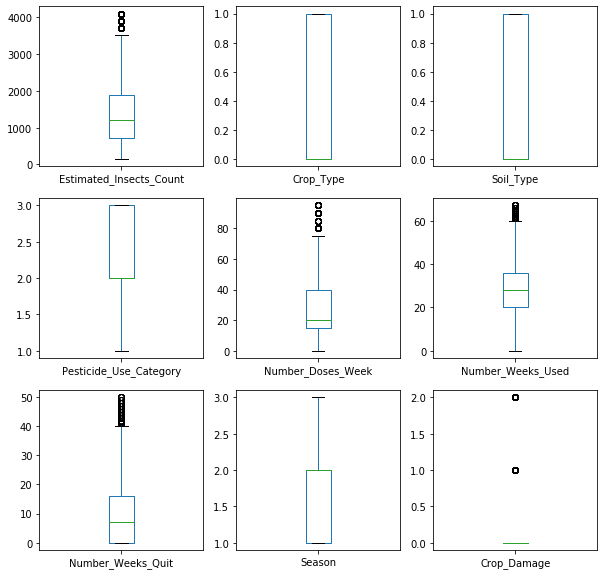

In [83]:
# plotting boxplots for each attribute
agriculture_data.plot.box(subplots=True,figsize=(10,10),layout=(3,3))

Obs: Estimated_Insects_count,Number_Doses_Week, Number_Weeks_Used and Number_Weeks_Quit have Outliers

#### Univariate Analysis

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64


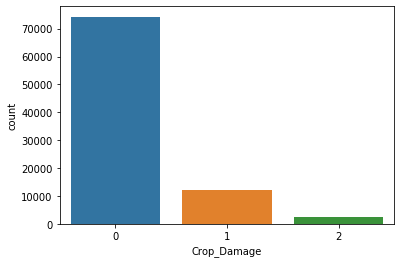

In [84]:
#Taking count of crop damage by other reasons (1),damage by pesticides (2) and alive(0)
sb.countplot(x='Crop_Damage',data=agriculture_data)
print(agriculture_data['Crop_Damage'].value_counts())

Obs: In most observations crop is alive and very least damaged by pesticides

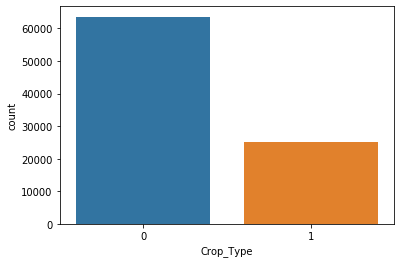

0    63589
1    25269
Name: Crop_Type, dtype: int64


In [85]:
sb.countplot(x='Crop_Type',data=agriculture_data)
plt.show()
print(agriculture_data['Crop_Type'].value_counts())

Obs:Crop type 0 is more with 63589 but crop type 1 is less in number with upto 25000

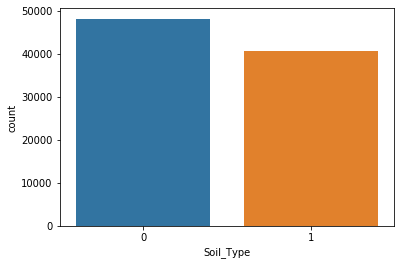

0    48124
1    40734
Name: Soil_Type, dtype: int64


In [86]:
sb.countplot(x='Soil_Type',data=agriculture_data)
plt.show()
print(agriculture_data['Soil_Type'].value_counts())

Obs: soil type is 0 used more than 1

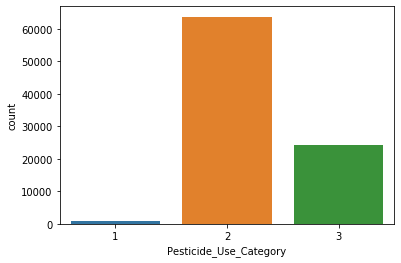

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64


In [87]:
# viewing count of pesticide category--Never(1),Previously used(2),Currently using (3)
sb.countplot(x='Pesticide_Use_Category',data=agriculture_data)
plt.show()
print(agriculture_data['Pesticide_Use_Category'].value_counts())

Obs: Previously used pesticide is used on large scale and very less number of times pesticide was not used at all

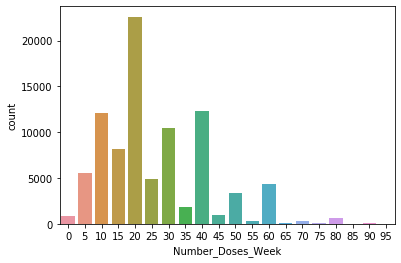

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64


In [88]:
# count of number of doses per week
sb.countplot(x='Number_Doses_Week',data=agriculture_data)
plt.show()
print(agriculture_data['Number_Doses_Week'].value_counts())

 Obs:20 doses per week was given maximum number of times

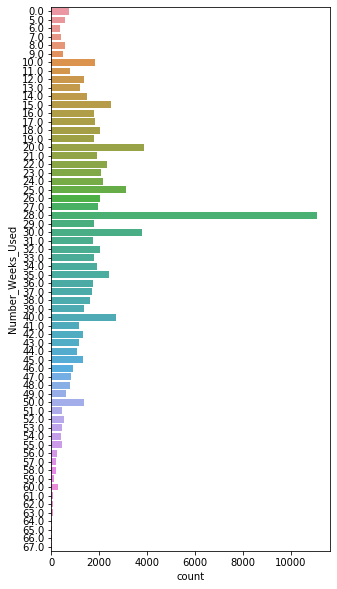

28.0    11097
20.0     3878
30.0     3765
25.0     3120
40.0     2707
        ...  
63.0       50
64.0       44
65.0       31
66.0       17
67.0        8
Name: Number_Weeks_Used, Length: 64, dtype: int64


In [89]:
# count of number of weeks used
plt.figure(figsize=(5,10))
sb.countplot(y='Number_Weeks_Used',data=agriculture_data)
plt.show()
print(agriculture_data['Number_Weeks_Used'].value_counts())

Obs: 28 weeks was used in most crops and the least number of weeks used was 8

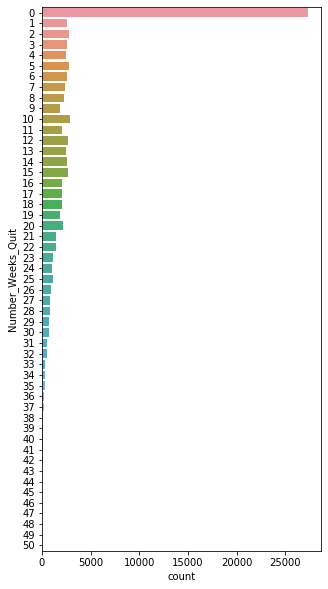

0     27274
10     2893
5      2831
2      2743
12     2701
15     2668
1      2620
14     2610
6      2584
3      2578
4      2528
13     2485
7      2418
8      2294
20     2209
16     2108
11     2090
18     2030
17     2018
9      1897
19     1841
21     1436
22     1414
23     1166
25     1109
24     1054
26      894
27      820
28      808
30      751
29      719
31      530
32      505
33      370
34      345
35      301
36      248
37      221
38      162
40      133
39      109
41       86
42       75
43       51
44       38
45       30
46       22
47       21
48       10
50        6
49        4
Name: Number_Weeks_Quit, dtype: int64


In [90]:
# count of number of weeks Quitted
plt.figure(figsize=(5,10))
sb.countplot(y='Number_Weeks_Quit',data=agriculture_data)
plt.show()
print(agriculture_data['Number_Weeks_Quit'].value_counts())

Obs: Most of the times no weeks was quitted

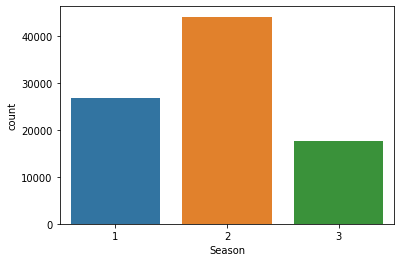

2    44210
1    26902
3    17746
Name: Season, dtype: int64


In [91]:
# count of seasons
sb.countplot(x='Season',data=agriculture_data)
plt.show()
print(agriculture_data['Season'].value_counts())

Obs: Season 2 was largely used season for crop harvesting and least crop harvesting was done in season 3

#### Bivariate Analysis

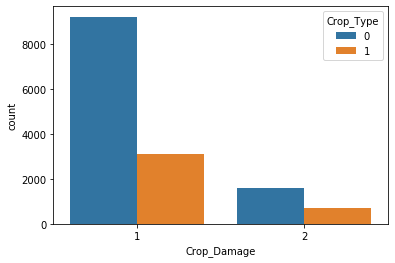

In [92]:
#Crop damage vs crop_type --only for damaged crops therfore skipping crops which is alive
df=agriculture_data[agriculture_data['Crop_Damage']!=0]
sb.countplot(x='Crop_Damage',hue='Crop_Type',data=df)
plt.show()

Obs: crop type '0' was damaged by pesticides more than crop type '1'

Crop type '0' was damaged more due to other reasons

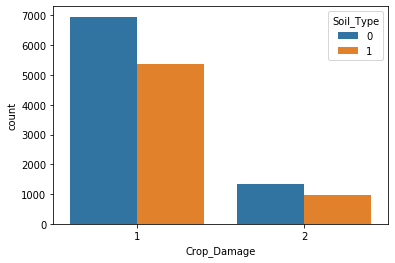

In [93]:
#Crop damage vs soil_type --only for damaged crops therfore skipping crops which is alive
sb.countplot(x='Crop_Damage',hue='Soil_Type',data=df)
plt.show()

Obs: Crops where Soil type '0' was used are damaged due to pesticides more than the crops where soil type 1 was used

 Crops where Soil type '0' was used are damaged due to other reasons more than the crops where soil type 1 was used

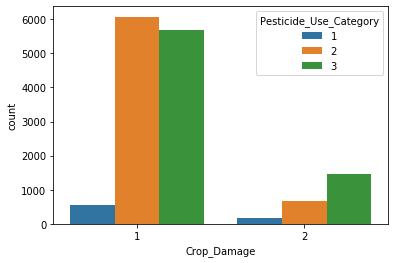

In [94]:
#Crop damage vs Pesticide_Use_Category --Never(1),Previously used(2),currently using(3)
sb.countplot(x='Crop_Damage',hue='Pesticide_Use_Category',data=df)
plt.show()

Obs:

Crop damaged by pesticides are very less when pesticides was never used i.e (1)

When previously used presticide was used Crop damaged by other reasons is highest

When currently using pesticide is used crop damage by other reason is high but less than the previous case

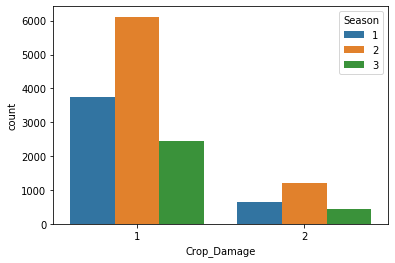

In [95]:
#viewing crop damage count with respect to season
sb.countplot(x='Crop_Damage',hue='Season',data=agriculture_data[agriculture_data['Crop_Damage']!=0])

Obs:

crop damage count in season 2 highest

In season 2 most crop damage due to other reasons and damage due to pesticide was less

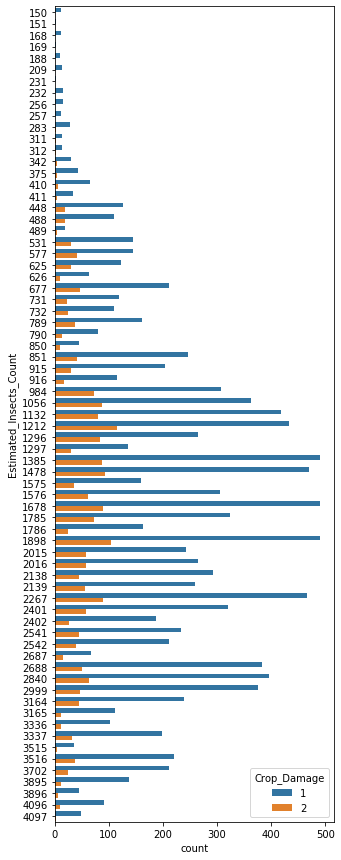

In [96]:
#viewing crop damage count with respect to Estimated_Insects_Count
plt.figure(figsize=(5,15))
sb.countplot(y='Estimated_Insects_Count',hue='Crop_Damage',data=agriculture_data[agriculture_data['Crop_Damage']!=0])

Obs: Insects count is very much higher in cases where crop was damaged due to othre reasons

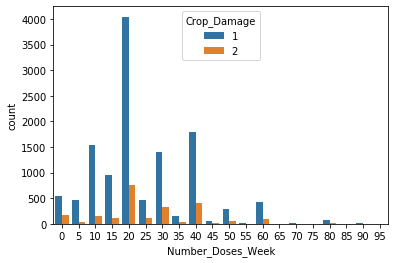

In [97]:
#viewing crop damage count with respect to Number_Doses_Week
sb.countplot(x='Number_Doses_Week',hue='Crop_Damage',data=df)
plt.show()

Obs: Crop damage due to other reasons and due to pesticides was highest when number of doses per week was 20

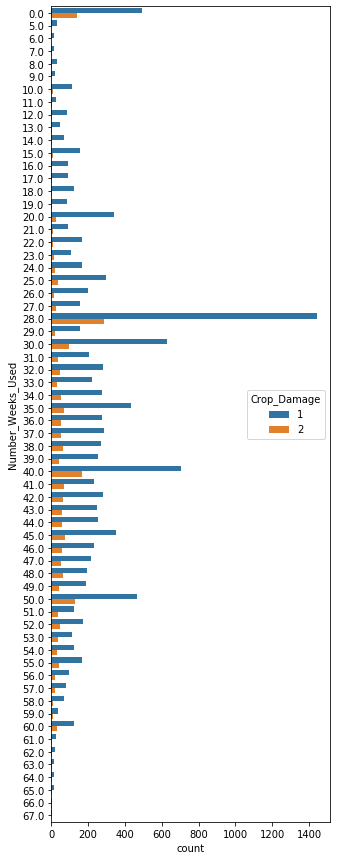

In [98]:
#viewing crop damage count with respect to Number of weeks used
plt.figure(figsize=(5,15))
sb.countplot(y='Number_Weeks_Used',hue='Crop_Damage',data=df)
plt.show()

Obs: When number of weeks used was 28 crop damage count was highest by both ways (pesticide as well as other reasons)

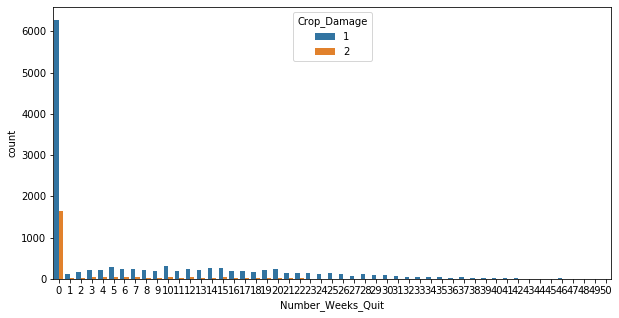

In [99]:
#viewing crop damage count with respect to Number of weeks quitted
plt.figure(figsize=(10,5))
sb.countplot(x='Number_Weeks_Quit',hue='Crop_Damage',data=df)
plt.show()

Obs: When no weeks was quitted crop damage was highest by both ways

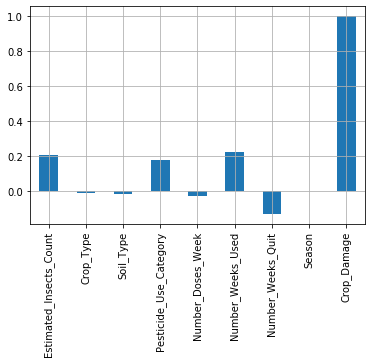

In [100]:
#checking correlation of all attributes with crop damage
agriculture_data.corrwith(agriculture_data['Crop_Damage']).plot(kind='bar',grid=True)

Obs: Correlation of Crop_damage with all columns is less than 0.3 with highest correlation with Number_weeks_used and Number_insects_count

Estimated_Insects_count,Number_weeks_used is positively correlated

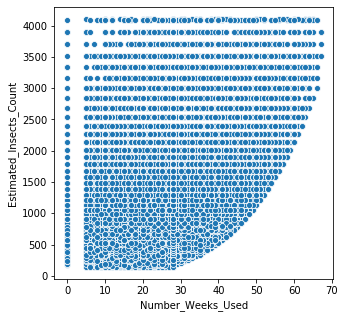

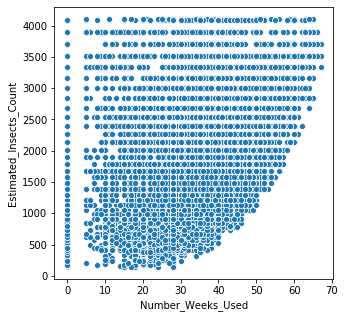

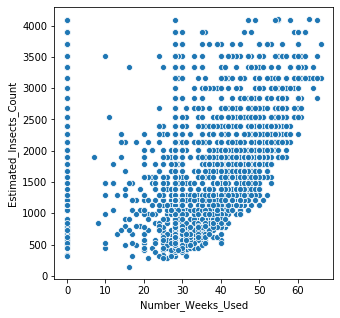

In [101]:
# Estimated insects count vs Number of weeks used
for i in [0,1,2]:
    plt.subplots(figsize=(5,5))
    df_=agriculture_data[agriculture_data['Crop_Damage']==i]
    sb.scatterplot(y=df_['Estimated_Insects_Count'],x=df_['Number_Weeks_Used'])

obs: When number of weeks used exceeds 30 insects count found increasing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D9803E788>,
      dtype=object)

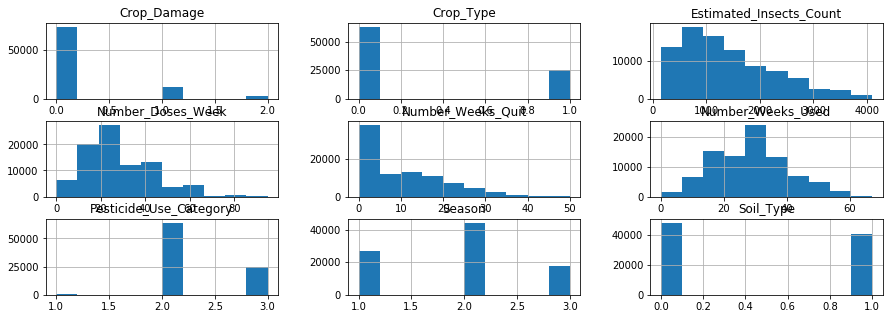

In [102]:
#viewing distribution of attribites using histograms
agriculture_data.hist(figsize=(15,5),layout=(3,3))

#### Dealing with Outliers

In [103]:
from scipy.stats import zscore
z=abs(zscore(agriculture_data))
agriculture_data_no_outliers=agriculture_data[(z<3).all(axis=1)]
print(agriculture_data.shape)
print(agriculture_data_no_outliers.shape)
print(agriculture_data.shape[0]-agriculture_data_no_outliers.shape[0] ,' rows removed as Outliers')

(88858, 9)
(84853, 9)
4005  rows removed as Outliers


In [104]:
# Having a view on target column after removing outliers
agriculture_data_no_outliers['Crop_Damage'].unique()

array([0, 1], dtype=int64)

Obs: Category '2' is completely removed in removing outliers hence at model buliding time we will not use outliers removed data since every class is necessary for us but will use the scaled data

#### Checking skewness

In [105]:
agriculture_data.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.274030
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

#### Dealing with skewness:

In [106]:
#using Yeo Johnson's method
from sklearn.preprocessing import PowerTransformer
pt=[]
k=0
for i in agriculture_data.drop('Crop_Damage',axis=1).columns:
    if(agriculture_data[i].skew()>0.55):
        pt.append(PowerTransformer())
        pt[k].fit(agriculture_data[i].values.reshape(-1,1))
        agriculture_data[i]=pt[k].transform(agriculture_data[i].values.reshape(-1,1))
        k=k+1

In [107]:
agriculture_data.skew()

Estimated_Insects_Count   -0.040977
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category    -0.075679
Number_Doses_Week          0.002722
Number_Weeks_Used          0.274030
Number_Weeks_Quit         -0.108017
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

In [108]:
agriculture_data.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,-2.208548,1.586343,0,-4.573992,-2.969863,0.0,-1.272764,1,0
1,-2.113450,1.586343,0,-4.573992,-2.969863,0.0,-1.272764,2,1
2,-1.918894,1.586343,0,-4.573992,-2.969863,0.0,-1.272764,2,1
3,-1.918894,1.586343,1,-4.573992,-2.969863,0.0,-1.272764,2,1
4,-1.629497,1.586343,0,-4.573992,-2.969863,0.0,-1.272764,2,1


#### Scaling the data

In [109]:
from sklearn.preprocessing import StandardScaler
X=agriculture_data.iloc[:,0:-1]
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)
Y=agriculture_data.iloc[:,-1]

#### Checking skewness again

In [110]:
pd.DataFrame(X).skew()

0   -0.040977
1    0.955978
2    0.166914
3   -0.075679
4    0.002722
5    0.274030
6   -0.108017
7    0.145228
dtype: float64

### Model Preparation

In [111]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,f1_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [112]:
# preparing a method to get accuracy at best random state
def classification_bestrandomstate(x,y,test_size,model):
    max=0
    ind=0
    for i in range(0,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i,stratify=y)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < accuracy_score(test_y,pred)):
                max=accuracy_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind,stratify=y)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('Best Accuracy score :\n',accuracy_score(test_y,pred),'at random state',ind)
    print('\nclassification_report :\n',classification_report(test_y,pred))
    print('\nconfusion_matrix :\n',confusion_matrix(test_y,pred))
    acc_score.append(accuracy_score(test_y,pred))
    print('\n\n')

In [120]:
acc_score=[]
cross_val_score_=[]
models=[KNeighborsClassifier(),DecisionTreeClassifier()]
for i,k in zip(models,['KNeighbor','DecisionTree']):
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$',k,'$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    classification_bestrandomstate(X,Y,0.3,i)
    score_=cross_val_score(i,X,Y,cv=10,scoring='accuracy')
    cross_val_score_.append(score_.mean())

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ KNeighbor $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Best Accuracy score :
 0.8331832845674845 at random state 85

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22272
           1       0.43      0.22      0.29      3692
           2       0.15      0.01      0.03       694

    accuracy                           0.83     26658
   macro avg       0.48      0.40      0.41     26658
weighted avg       0.79      0.83      0.80     26658


confusion_matrix :
 [[21405   851    16]
 [ 2856   796    40]
 [  478   206    10]]



$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ DecisionTree $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Best Accuracy score :
 0.7549328531772826 at random state 85

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     22272
           1       0.26      0.29      0.28      3692
           2       0.08      0.09      0.08      

In [119]:
model_=SVC()
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
model_.fit(train_x,train_y)
pred=model_.predict(test_x)
print('Best Accuracy score :\n',accuracy_score(test_y,pred))
print('\nclassification_report :\n',classification_report(test_y,pred))

Best Accuracy score :
 0.8416985520294096

classification_report :
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     22272
           1       0.54      0.10      0.17      3692
           2       0.00      0.00      0.00       694

    accuracy                           0.84     26658
   macro avg       0.46      0.36      0.36     26658
weighted avg       0.78      0.84      0.79     26658



Observation: SVC is giving highest accuracy but we can see that precision  and recall for class 2 is 0 in SVC hence we will consider KNN and not SVC

#### Checking cross val score 

In [123]:
pd.DataFrame([acc_score,cross_val_score_],index=['Accuracy_score','cross_valscore'],columns=['KNeighbor','DecisionTree'])

,KNeighbor,DecisionTree
Accuracy_score,0.833183,0.754933
cross_valscore,0.828434,0.749117


Obs: Model is not underfitted / overfitted

#### hyperparameter tuning

In [124]:
#preparing a method to perform hyperparameter tuning :
def gridsearch(x,y,model,parameter_dictionary):
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=10,scoring='accuracy')
        grid_cv.fit(x,y)
        print('\n')   
        print('mean accuracy_score :',grid_cv.best_score_)
        print('best Parameter :',grid_cv.best_params_)

In [128]:
gridsearch(X,Y,KNeighborsClassifier(),{'n_neighbors':range(50)})



mean accuracy_score : 0.8435031058701281
best Parameter : {'n_neighbors': 34}


Obs: Best parameter is n_neighbors 34

#### Trying Ensemble techniques:

In [130]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [131]:
gridsearch(X,Y,AdaBoostClassifier(),{'n_estimators': [10,50,100,150]})



mean accuracy_score : 0.8419950790422194
best Parameter : {'n_estimators': 150}


In [133]:
gridsearch(X,Y,GradientBoostingClassifier(),{'n_estimators': [10,50,100,150]})



mean accuracy_score : 0.8452699782184416
best Parameter : {'n_estimators': 150}


In [134]:
gridsearch(X,Y,RandomForestClassifier(),{'n_estimators': [10,50,100,150],'criterion':['gini','entropy']})



mean accuracy_score : 0.8227846652863363
best Parameter : {'criterion': 'gini', 'n_estimators': 150}


Obs: Best mean accuracy is achieved by GradientBoostingClassifier 

#### Finalizing the model:

In [140]:
#checking best possible accuracy
model_=GradientBoostingClassifier(n_estimators=150)
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=85,stratify=Y)
model_.fit(train_x,train_y)
pred=model_.predict(test_x)
print('Best Accuracy score :\n',accuracy_score(test_y,pred))
print('\nclassification_report :\n',classification_report(test_y,pred))
score__=cross_val_score(GradientBoostingClassifier(n_estimators=150),X,Y,cv=10,scoring='accuracy')
print(score__.mean())
print(score__.std())

Best Accuracy score :
 0.8463500637707255

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     22272
           1       0.56      0.15      0.23      3692
           2       0.20      0.00      0.00       694

    accuracy                           0.85     26658
   macro avg       0.54      0.38      0.38     26658
weighted avg       0.80      0.85      0.80     26658

0.8452924867999096
0.0014335206642092592


#### Saving the model

In [203]:
from sklearn.externals import joblib
joblib.dump(model_,'agriculture_data_model.obj')

['agriculture_data_model.obj']

### Importing Test data file

In [204]:
test_data=pd.read_excel('test_agriculture (1).xlsx')

#### Data preprocessing for test data

In [205]:
test_data.drop(['ID'],inplace=True,axis=1)
test_data['Number_Weeks_Used']=test_data['Number_Weeks_Used'].fillna(28.0)

In [206]:
cols=['Estimated_Insects_Count','Crop_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Quit']

In [207]:
for i,k in zip(cols,range(5)):
    test_data[i]=pt[k].transform(test_data[i].values.reshape(-1,1))

In [208]:
x_test=sc.transform(test_data)

In [209]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7
0,-2.208548,1.586343,1.086932,-4.573992,-2.969863,-0.047729,-1.272764,0.146924
1,-1.432656,1.586343,1.086932,-4.573992,-2.969863,-2.430909,-1.272764,0.146924
2,-0.929923,1.586343,-0.920021,-4.573992,-2.969863,-2.430909,-1.272764,0.146924
3,-0.729347,1.586343,-0.920021,-4.573992,-2.969863,-2.430909,-1.272764,0.146924
4,-0.627148,-0.630381,-0.920021,-4.573992,-2.969863,-2.430909,-1.272764,-1.278962


In [210]:
imported_model=joblib.load('agriculture_data_model.obj')

In [211]:
predicted=imported_model.predict(x_test)

In [212]:
df__=pd.DataFrame(predicted,columns=['Crop_Damage'])
df__.to_csv('predicted_cropDamage')